In [1]:
import cv2
import os

# Input and output directories
input_folder = "C:\\Users\\yashp\\Downloads\\processed_images_sme\\png"
output_folder = "C:\\Users\\yashp\\OneDrive\\Desktop\\LAB FINAL2"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through all files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.png'):
        # Load the image
        image = cv2.imread(os.path.join(input_folder, filename))
        
        # Convert the image to LAB color space
        lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        
        # Save the LAB image to the output folder
        output_filename = os.path.join(output_folder, filename)
        cv2.imwrite(output_filename, lab_image)
        print(f"{filename} converted to LAB and saved as {output_filename}")


image_116.png converted to LAB and saved as C:\Users\yashp\OneDrive\Desktop\LAB FINAL2\image_116.png
image_123.png converted to LAB and saved as C:\Users\yashp\OneDrive\Desktop\LAB FINAL2\image_123.png
image_178.png converted to LAB and saved as C:\Users\yashp\OneDrive\Desktop\LAB FINAL2\image_178.png
image_180.png converted to LAB and saved as C:\Users\yashp\OneDrive\Desktop\LAB FINAL2\image_180.png
image_223.png converted to LAB and saved as C:\Users\yashp\OneDrive\Desktop\LAB FINAL2\image_223.png
image_224.png converted to LAB and saved as C:\Users\yashp\OneDrive\Desktop\LAB FINAL2\image_224.png
image_265.png converted to LAB and saved as C:\Users\yashp\OneDrive\Desktop\LAB FINAL2\image_265.png
image_266.png converted to LAB and saved as C:\Users\yashp\OneDrive\Desktop\LAB FINAL2\image_266.png
image_3.png converted to LAB and saved as C:\Users\yashp\OneDrive\Desktop\LAB FINAL2\image_3.png
image_4.png converted to LAB and saved as C:\Users\yashp\OneDrive\Desktop\LAB FINAL2\image_4.pn

In [6]:
import cv2
import numpy as np
import os
from math import atan2, degrees

# Function to calculate chroma
def chroma(a, b):
    return np.sqrt(a ** 2 + b ** 2)

# Function to calculate hue angle
def hue_angle(a, b):
    hue_angles = np.zeros_like(a)
    for i in range(len(a)):
        hue_angles[i] = degrees(atan2(b[i], a[i]))
    return hue_angles

# Function to calculate Delta E (CIE76)
# Function to calculate Delta E (CIE76)
def deltaE_cie76(color1_lab, color2_lab):
    delta_L = color2_lab[0] - color1_lab[0]
    delta_a = color2_lab[1] - color1_lab[1]
    delta_b = color2_lab[2] - color1_lab[2]
    delta_E = np.sqrt(delta_L**2 + delta_a**2 + delta_b**2)
    return delta_E


# Function to calculate browning index
def calculate_browning_index(image_lab, reference_lab):
    L, a, b = cv2.split(image_lab)
    x = (a + 1.75 * L) / (5.645 * L + a - 3.012 * b)
    browning_idx = (100 * (x - 0.31)) / 0.17
    return np.mean(browning_idx)

# Input and output directories
input_folder = 'C:\\Users\\yashp\\OneDrive\\Desktop\\LAB FINAL2'
output_file = 'C:\\Users\\yashp\\OneDrive\\Desktop\\labval7.csv'  

# Define a reference LAB value for browning
reference_lab = np.array([100, 0, 0])  

# Open the output file for appending
with open(output_file, 'a') as f:
    f.write("Filename,Mean_Delta_E,Mean_Chroma,Mean_Hue_Angle,Browning_Index\n")
    
    # Iterate through all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.png'):
            # Load LAB image
            lab_image = cv2.imread(os.path.join(input_folder, filename))
            lab_image = cv2.cvtColor(lab_image, cv2.COLOR_BGR2LAB)

            # Calculate chroma and hue angle
            a_channel, b_channel = cv2.split(lab_image[:, :, 1:])
            chroma_values = chroma(a_channel.flatten(), b_channel.flatten())
            hue_angles = hue_angle(a_channel.flatten(), b_channel.flatten())

            # Calculate browning index
            browning_idx = calculate_browning_index(lab_image, reference_lab)

            # Calculate delta E values
            delta_e_values = deltaE_cie76(lab_image, reference_lab)

            # Write the metrics to the output file
            f.write(f"{filename},{delta_e_values.mean()},{chroma_values.mean()},{hue_angles.mean()},{browning_idx}\n")

print("Metrics calculated and appended to", output_file)


Metrics calculated and appended to C:\Users\yashp\OneDrive\Desktop\labval7.csv


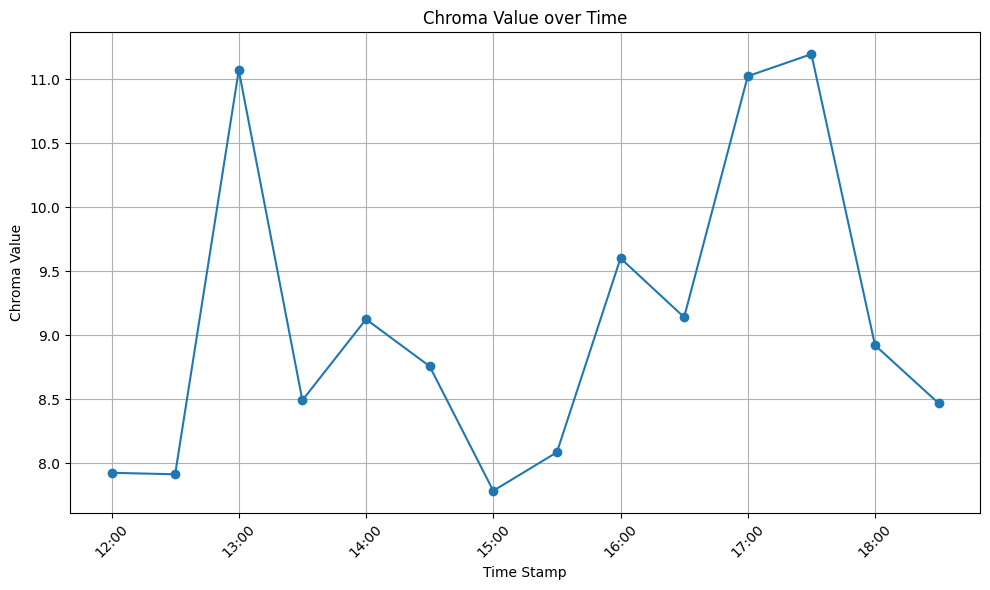

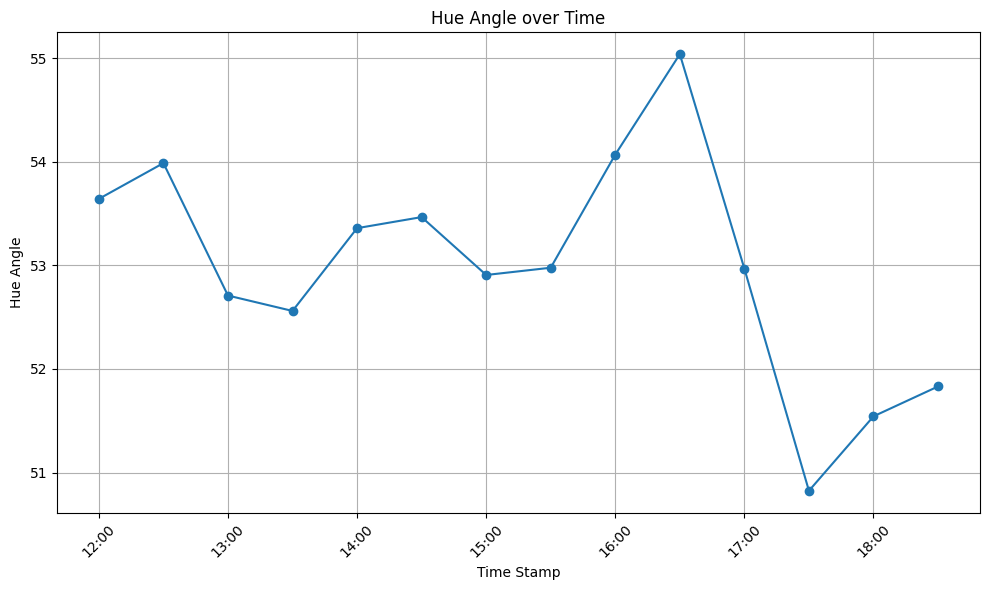

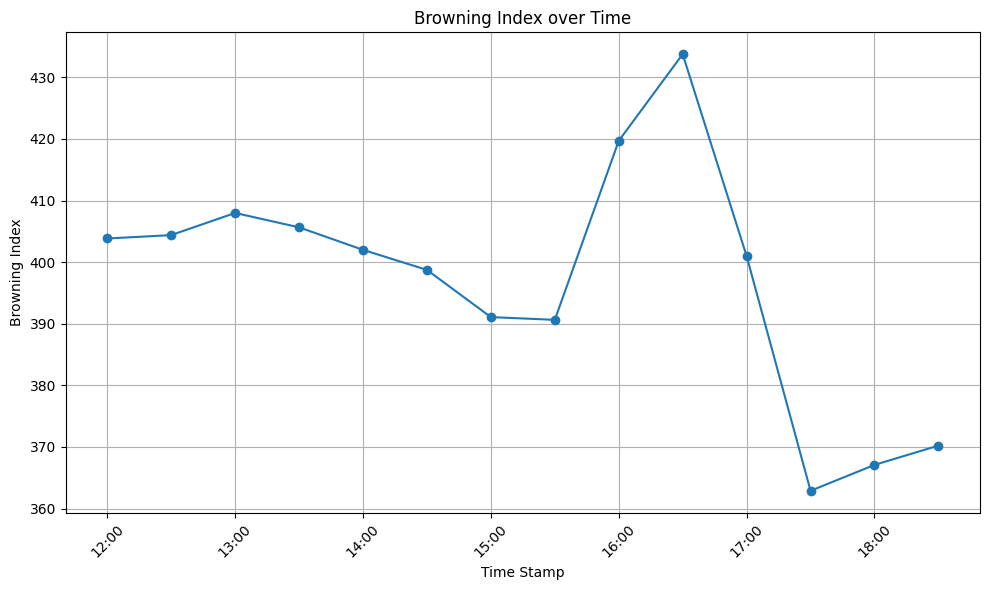

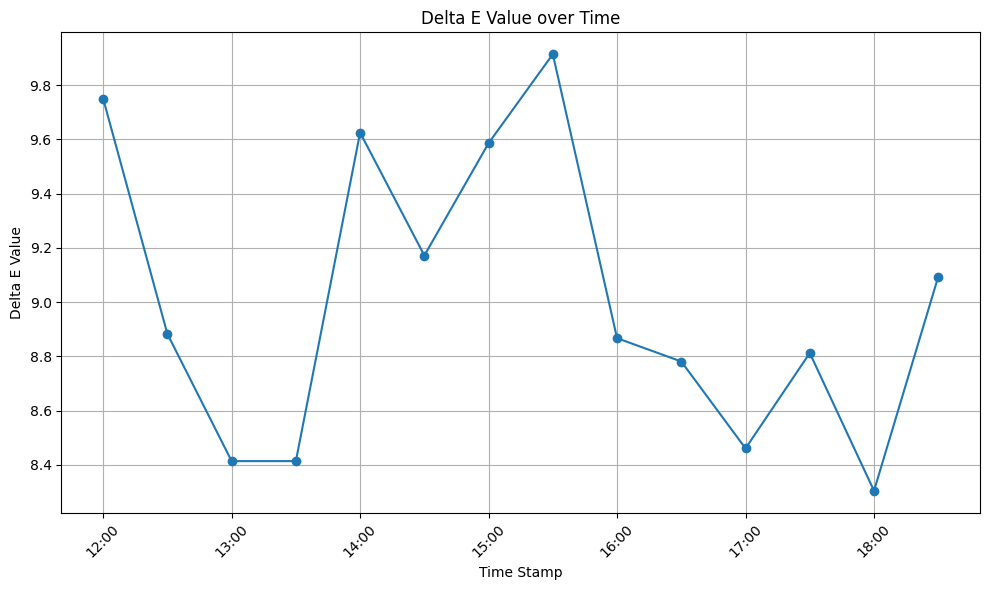

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Load the dataset from CSV file
df = pd.read_csv("C:\\Users\\yashp\\OneDrive\\Desktop\\labval7.csv")

# Generate time stamps with half-hour intervals from 12 pm to 6:30 pm
start_time = pd.to_datetime("2023-06-14 12:00:00")
time_stamps = pd.date_range(start=start_time, periods=14, freq="30T")

# Plot Chroma values
plt.figure(figsize=(10, 6))
plt.plot(time_stamps, df["Chroma"], marker='o', linestyle='-')
plt.xlabel('Time Stamp')
plt.ylabel('Chroma Value')
plt.title('Chroma Value over Time')
date_formatter = DateFormatter('%H:%M')  # Format: hours:minutes
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Hue Angle values
plt.figure(figsize=(10, 6))
plt.plot(time_stamps, df["Hue Angle"], marker='o', linestyle='-')
plt.xlabel('Time Stamp')
plt.ylabel('Hue Angle')
plt.title('Hue Angle over Time')
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Browning Index values
plt.figure(figsize=(10, 6))
plt.plot(time_stamps, df["Browning Index"], marker='o', linestyle='-')
plt.xlabel('Time Stamp')
plt.ylabel('Browning Index')
plt.title('Browning Index over Time')
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Delta E values
plt.figure(figsize=(10, 6))
plt.plot(time_stamps, df["DeltaE"], marker='o', linestyle='-')
plt.xlabel('Time Stamp')
plt.ylabel('Delta E Value')
plt.title('Delta E Value over Time')
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
